Sample Size: 420
Test Score Mean: 654.156548055013
Test Score Median: 654.4499816894536
Test Score Std Dev: 19.053347643618803
STRatio Mean: 19.64042526199704
STRatio Median: 19.7232084274292
STRatio Std Dev: 1.8918117872336768


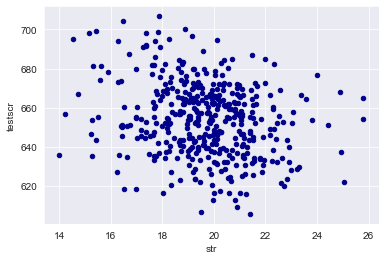

In [1]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import pandas as pd

df = pd.read_csv('Caschool.csv', encoding='latin-1')

print("Sample Size:", len(df))
print("Test Score Mean:", df["testscr"].mean())
print("Test Score Median:",df["testscr"].median())
print("Test Score Std Dev:",df["testscr"].std())

print("STRatio Mean:", df["str"].mean())
print("STRatio Median:",df["str"].median())
print("STRatio Std Dev:",df["str"].std())

ax1 = df.plot.scatter(x='str', y='testscr', c='DarkBlue')



In [2]:
df = sm.add_constant(df) 

reg1 = sm.OLS(endog=df['testscr'], exog=df[['const','str']], missing='drop')
type(reg1)

results = reg1.fit()
type(results)

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           2.78e-06
Time:                        11:46:35   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.9330      9.467     73.825      0.0

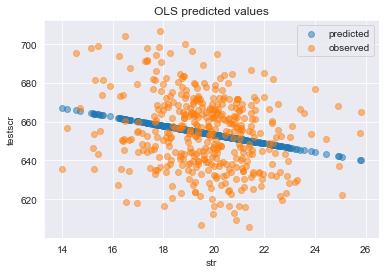

In [3]:
df_plot = df.dropna(subset=['testscr', 'str'])

# Plot predicted values

plt.scatter(df_plot['str'], results.predict(), alpha=0.5, label='predicted')

# Plot observed values

plt.scatter(df_plot['str'], df_plot['testscr'], alpha=0.5, label='observed')

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('str')
plt.ylabel('testscr')
plt.show()